In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,mean_squared_error,r2_score

In [2]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
X=df.drop('Type',axis=1)
y=df['Type']
scaler=StandardScaler()

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [6]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [7]:
X_test.shape

(65, 9)

In [8]:
X_train.shape

(149, 9)

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
parameters=[{'n_neighbors':[5,10,15],'weights': ['uniform']},
           {'n_neighbors':[5,10,15],'weights': ['distance']}]

In [22]:
knn=KNeighborsClassifier(n_neighbors= 5, weights= 'distance')
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           1       0.76      0.81      0.79        27
           2       0.58      0.88      0.70        16
           3       1.00      0.11      0.20         9
           5       1.00      0.80      0.89         5
           6       0.80      1.00      0.89         4
           7       1.00      0.50      0.67         4

    accuracy                           0.72        65
   macro avg       0.86      0.68      0.69        65
weighted avg       0.78      0.72      0.69        65

[[22  5  0  0  0  0]
 [ 1 14  0  0  1  0]
 [ 5  3  1  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  4  0]
 [ 1  1  0  0  0  2]]


In [19]:
grid_search=GridSearchCV(estimator=knn,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
grid_search.fit(X_train,y_train)

F:\ANACONDARAJ\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
F:\ANACONDARAJ\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [5, 10, 15], 'weights': ['uniform']},
                         {'n_neighbors': [5, 10, 15], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [20]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [21]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors= 5, weights= 'distance')
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           1       0.76      0.81      0.79        27
           2       0.58      0.88      0.70        16
           3       1.00      0.11      0.20         9
           5       1.00      0.80      0.89         5
           6       0.80      1.00      0.89         4
           7       1.00      0.50      0.67         4

    accuracy                           0.72        65
   macro avg       0.86      0.68      0.69        65
weighted avg       0.78      0.72      0.69        65

[[22  5  0  0  0  0]
 [ 1 14  0  0  1  0]
 [ 5  3  1  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  4  0]
 [ 1  1  0  0  0  2]]


In [23]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
pred_xgb=xgb.predict(X_test)
print(classification_report(y_test,pred_xgb))
print(confusion_matrix(y_test,pred_xgb))

              precision    recall  f1-score   support

           1       0.75      0.89      0.81        27
           2       0.57      0.75      0.65        16
           3       1.00      0.11      0.20         9
           5       0.71      1.00      0.83         5
           6       1.00      0.50      0.67         4
           7       1.00      0.50      0.67         4

    accuracy                           0.71        65
   macro avg       0.84      0.62      0.64        65
weighted avg       0.77      0.71      0.67        65

[[24  3  0  0  0  0]
 [ 3 12  0  1  0  0]
 [ 3  5  1  0  0  0]
 [ 0  0  0  5  0  0]
 [ 1  0  0  1  2  0]
 [ 1  1  0  0  0  2]]


In [24]:
df1=pd.read_csv('C:\\Users\\User\\Downloads\\zoo.csv')

In [25]:
df1.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [26]:
df1['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [27]:
df1['animal name'].nunique()

100

In [28]:
len(df1)

101

In [29]:
df1=df1.drop('animal name',axis=1)

In [30]:
X=df1.drop('type',axis=1)
y=df1['type']

In [31]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
X_train.shape

(70, 16)

In [35]:
X_test.shape

(31, 16)

In [36]:
grid_search=GridSearchCV(estimator=knn,param_grid=parameters,n_jobs=-1,cv=10,scoring='accuracy')
grid_search.fit(X_train,y_train)

F:\ANACONDARAJ\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
F:\ANACONDARAJ\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='distance'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [5, 10, 15], 'weights': ['uniform']},
                         {'n_neighbors': [5, 10, 15], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [37]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [38]:
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [39]:
knn=KNeighborsClassifier(n_neighbors= 5, weights= 'distance')
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           0.97        31
   macro avg       0.84      0.86      0.85        31
weighted avg       0.94      0.97      0.95        31

[[10  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  4]]


F:\ANACONDARAJ\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
df2=pd.read_excel('C:\\Users\\User\\Downloads\\Corolla.xlsx')

In [212]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [172]:
df2.head(2)

,Id,Price,...,Color_White,Color_Yellow
0,1,13500,...,0,0
1,2,13750,...,0,0


In [169]:
df2.select_dtypes(include=[np.number])

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_Diesel,Fuel_Type_Petrol,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
1,2,13750,23,10,2002,72937,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,4,14950,26,7,2002,48000,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,5,13750,30,3,2002,38500,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0
5,6,12950,32,1,2002,61000,90,0,0,2000,3,4,5,210,1170,0,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
6,7,16900,27,6,2002,94612,90,1,0,2000,3,4,5,210,1245,0,1,3,1,1,1,1,0,1,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
7,8,18600,30,3,2002,75889,90,1,0,2000,3,4,5,210,1245,1,1,3,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8,9,21500,27,6,2002,19700,192,0,0,1800,3,4,5,100,1185,0,1,3,1,1,0,1,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0
9,10,12950,23,10,2002,71138,69,0,0,1900,3,4,5,185,1105,0,1,3,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [148]:
df2.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0


In [149]:
dumy=pd.get_dummies(df2[['Fuel_Type','Color']],drop_first=True)

In [150]:
df2=df2.drop(['Fuel_Type', 'Color'],axis=1)
df2=pd.concat([df2,dumy],axis=1)

In [151]:
df2=df2.drop('Model',axis=1)

In [110]:
#df2['Color'].value_counts()

In [77]:
#df2.isnull().sum()

In [ ]:
#"Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")

In [200]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45]]
X_Modeled = backwardElimination(X_opt, SL)

In [201]:
X_Modeled = backwardElimination(X_opt, SL)

In [206]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     505.9
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:15:45   Log-Likelihood:                -12210.
No. Observations:                1436   AIC:                         2.447e+04
Df Residuals:                    1412   BIC:                         2.459e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0156      0.001    -23.647      0.000      -0.017      -0.014
x1             2.6484      0.259     10.233      0.000       2.141       3.156
x2          -191.5665      6.972    -27.478      0.000    -205.242    -177.891
x3          -160.1996     11.122    -14.404      0.000    -182.016    -138.383
x4            -2.0373      0.742     -2.746      0.006      -3.492      -0.582
x5            -0.0088      0.001     -5.987      0.000      -0.012      -0.006
x6            28.7785      3.231      8.908      0.000      22.441      35.116
x7          -101.7042     73.334     -1.387      0.166    -245.560      42.152
x8           392.0942    143.979      2.723      0.007     109.658     674.530
x9            -0.0626      0.003    -23.647      0.000      -0.068      -0.057
x10          618.2326    181.461      3.407      0.001     262.270     974.195
x11            9.7200      1.592      6.106      0.000       6.597      12.843
x12           14.2760      1.122     12.729      0.000      12.076      16.476
x13          243.0045     70.282      3.458      0.001     105.136     380.873
x14          213.7840    113.020      1.892      0.059      -7.920     435.488
x15          128.6317     76.001      1.693      0.091     -20.455     277.718
x16          880.9935    341.263      2.582      0.010     211.557    1550.430
x17         1821.1979    344.079      5.293      0.000    1146.237    2496.159
x18         1119.2392    231.070      4.844      0.000     665.961    1572.517
x19          951.1358    225.362      4.220      0.000     509.056    1393.216
x20          727.8890    230.365      3.160      0.002     275.994    1179.784
x21         1057.0554    225.813      4.681      0.000     614.090    1500.021
x22          855.8810    222.652      3.844      0.000     419.117    1292.645
x23         1142.4246    241.850      4.724      0.000     668.002    1616.848
x24         1477.4629    641.755      2.302      0.021     218.568    2736.358
x25          527.3287    731.563      0.721      0.471    -907.739    1962.397
==============================================================================
Omnibus:                      148.578   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1139.660
Skew:                           0.039   Prob(JB):                    3.36e-248
Kurtosis:                       7.364   Cond. No.                     2.58e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [176]:
import statsmodels.regression.linear_model as sm

In [162]:
X=np.append(arr=np.ones((1436,1)).astype(int),values=X,axis=1)

In [198]:
X=np.append(arr=np.ones((1436,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,2,3,4,5,6,7,8,11,12,13,14,15,16,30,35,36,37,38,39,40,41,42,43,45]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     505.9
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:58:51   Log-Likelihood:                -12210.
No. Observations:                1436   AIC:                         2.447e+04
Df Residuals:                    1412   BIC:                         2.459e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0156      0.001    -23.647      0.000      -0.017      -0.014
x1             2.6484      0.259     10.233      0.000       2.141       3.156
x2          -191.5665      6.972    -27.478      0.000    -205.242    -177.891
x3          -160.1996     11.122    -14.404      0.000    -182.016    -138.383
x4            -2.0373      0.742     -2.746      0.006      -3.492      -0.582
x5            -0.0088      0.001     -5.987      0.000      -0.012      -0.006
x6            28.7785      3.231      8.908      0.000      22.441      35.116
x7          -101.7042     73.334     -1.387      0.166    -245.560      42.152
x8           392.0942    143.979      2.723      0.007     109.658     674.530
x9            -0.0626      0.003    -23.647      0.000      -0.068      -0.057
x10          618.2326    181.461      3.407      0.001     262.270     974.195
x11            9.7200      1.592      6.106      0.000       6.597      12.843
x12           14.2760      1.122     12.729      0.000      12.076      16.476
x13          243.0045     70.282      3.458      0.001     105.136     380.873
x14          213.7840    113.020      1.892      0.059      -7.920     435.488
x15          128.6317     76.001      1.693      0.091     -20.455     277.718
x16          880.9935    341.263      2.582      0.010     211.557    1550.430
x17         1821.1979    344.079      5.293      0.000    1146.237    2496.159
x18         1119.2392    231.070      4.844      0.000     665.961    1572.517
x19          951.1358    225.362      4.220      0.000     509.056    1393.216
x20          727.8890    230.365      3.160      0.002     275.994    1179.784
x21         1057.0554    225.813      4.681      0.000     614.090    1500.021
x22          855.8810    222.652      3.844      0.000     419.117    1292.645
x23         1142.4246    241.850      4.724      0.000     668.002    1616.848
x24         1477.4629    641.755      2.302      0.021     218.568    2736.358
x25          527.3287    731.563      0.721      0.471    -907.739    1962.397
==============================================================================
Omnibus:                      148.578   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1139.660
Skew:                           0.039   Prob(JB):                    3.36e-248
Kurtosis:                       7.364   Cond. No.                     2.58e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [211]:
#df2.corr()['Price'].sort_values(ascending=False)

In [159]:
X=df2.drop('Price',axis=1)

In [160]:
y=df2['Price']

In [210]:
#X

In [209]:
#y

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
X_train.shape

(1005, 45)

In [83]:
X_test.shape

(431, 45)

In [84]:
from sklearn.linear_model import LinearRegression

In [130]:
lr=LinearRegression()

In [131]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
lr_pred=lr.predict(X_test)

In [133]:
lr_pred

array([10654.01851259, 11788.27883208, 10859.14919264, 18068.54423822,
        9930.21700926, 15319.50368807, 15204.00113481, 10486.47431052,
       11405.81534932,  9404.93450121, 11108.5340061 ,  9131.91189268,
       16093.82510532, 15158.02295146, 11667.30394539, 10749.6672681 ,
        7351.54662216,  7081.94301746,  7310.15802437, 11474.55556741,
       10358.73611679,  9080.36149677, 13661.37915472,  8206.57770397,
        6831.77666823, 10779.82426605,  8783.7961103 ,  7848.03821187,
        8836.99537467, 15041.90058422,  7990.78245656,  9815.9586425 ,
        9142.78691632,  9779.84099301,  8043.22392358,  7584.76376674,
        9502.10699337,  8504.41528488,  7882.18366138,  5928.55204058,
        8472.79103608,  9299.74514015,  8670.22175876,  6099.86371005,
        8388.58910139, 16559.27659492,  9936.76206782, 12536.36056653,
       12183.39672768,  8436.49086453,  8632.08436243, 22443.88960967,
       10892.18133934,  8358.42713588, 14811.70713674, 13210.3628497 ,
      

Text(0, 0.5, 'Predicted Y')

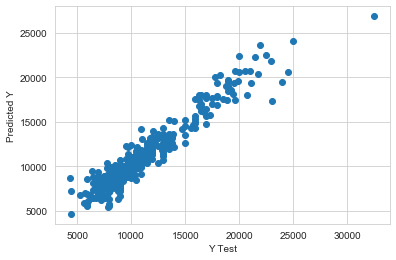

In [134]:
plt.scatter(y_test,lr_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

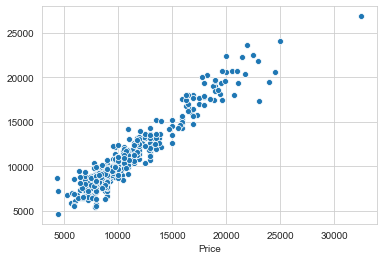

In [135]:
sns.set_style(style='whitegrid')
sns.scatterplot(y_test,lr_pred)

In [136]:
print(mean_absolute_error(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred))
print(mean_squared_error(y_test,lr_pred)**0.5)

842.4901563685737
1286207.9069247704
1134.111064633782


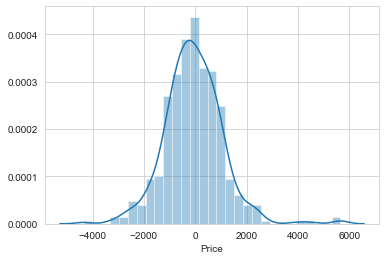

In [137]:
sns.distplot(y_test-lr_pred)

In [273]:
df3=pd.read_csv('C:\\Users\\User\\Downloads\\Computer_Data.csv')

In [274]:
df3.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [275]:
df3.columns

Index(['Unnamed: 0', 'price', 'speed', 'hd', 'ram', 'screen', 'cd', 'multi',
       'premium', 'ads', 'trend'],
      dtype='object')

In [276]:
df3=df3.drop('Unnamed: 0',axis=1)

In [277]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [278]:
df3['cd'].value_counts()

no     3351
yes    2908
Name: cd, dtype: int64

In [279]:
df3['multi'].value_counts()

no     5386
yes     873
Name: multi, dtype: int64

In [280]:
df3['premium'].value_counts()

yes    5647
no      612
Name: premium, dtype: int64

In [281]:
df3['premium']=df3['premium'].replace(('yes','no'),(1,0))

In [282]:
df3['cd']=df3['cd'].replace(('yes','no'),(1,0))
df3['multi']=df3['multi'].replace(('yes','no'),(1,0))

In [283]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [284]:
X.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [285]:
df3.corr()['price'].sort_values(ascending=False)

price      1.000000
ram        0.622748
hd         0.430258
speed      0.300976
screen     0.296041
cd         0.197343
ads        0.054540
multi     -0.016651
premium   -0.080696
trend     -0.199987
Name: price, dtype: float64

In [291]:
X=df3.drop('price',axis=1)
y=df3['price']

In [ ]:
X=X[:,[2,3,4,5,6,8]]

In [238]:
scl=StandardScaler()

In [254]:
d

In [255]:
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [256]:
X_test.shape

(1878, 9)

In [257]:
X_train.shape

(4381, 9)

In [258]:
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(mean_squared_error(y_test,pred_lr)**0.5)
print(r2_score(y_test,pred_lr))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [259]:
pred_lr=lr.predict(X_test)

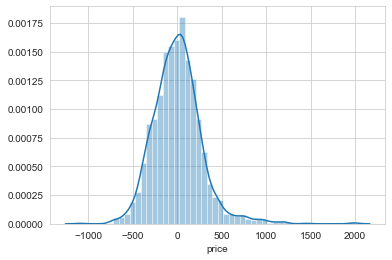

In [261]:
sns.distplot(y_test-pred_lr)

In [267]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 9 columns):
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null int64
multi      6259 non-null int64
premium    6259 non-null int64
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(9)
memory usage: 440.2 KB


In [300]:
print(mean_squared_error(y_test,pred_lr)**0.5)
print(r2_score(y_test,pred_lr))

275.4697646234087


In [301]:
print(r2_score(y_test,pred_lr))

0.7648783430311871


In [289]:
#y

In [287]:
X=np.append(arr=np.ones((6259,1)).astype(int),values=X,axis=1)
X_opt=X[:,[0,1,2,3,4,5,6,7,8]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     885.6
Date:                Thu, 20 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:50:13   Log-Likelihood:                -46344.
No. Observations:                6259   AIC:                         9.271e+04
Df Residuals:                    6250   BIC:                         9.277e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -54.3683     86.980     -0.625      0.532    -224.879     116.142
x1             6.2593      0.262     23.893      0.000       5.746       6.773
x2            -0.2993      0.035     -8.521      0.000      -0.368      -0.230
x3            77.5028      1.453     53.348      0.000      74.655      80.351
x4           102.7536      5.768     17.813      0.000      91.446     114.061
x5          -116.5376     13.394     -8.701      0.000    -142.794     -90.281
x6            24.0216     16.431      1.462      0.144      -8.189      56.233
x7          -361.1296     17.645    -20.467      0.000    -395.720    -326.540
x8             1.3842      0.073     18.949      0.000       1.241       1.527
==============================================================================
Omnibus:                     1588.025   Durbin-Watson:                   1.421
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5336.445
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       6.751   Cond. No.                     9.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [290]:
X_opt=X[:,[1,2,3,4,5,6,7,8]]
regressor_OLS=sm.OLS(endog=y,exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.523e+04
Date:                Thu, 20 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:52:49   Log-Likelihood:                         -46344.
No. Observations:                6259   AIC:                                  9.270e+04
Df Residuals:                    6251   BIC:                                  9.276e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.2550      0.262     23.886      0.000       5.742       6.768
x2            -0.2996      0.035     -8.531      0.000      -0.368      -0.231
x3            77.5552      1.450     53.476      0.000      74.712      80.398
x4            99.3555      1.929     51.519      0.000      95.575     103.136
x5          -115.8773     13.352     -8.679      0.000    -142.051     -89.704
x6            23.5666     16.414      1.436      0.151      -8.611      55.744
x7          -363.5437     17.216    -21.116      0.000    -397.293    -329.794
x8             1.3720      0.070     19.489      0.000       1.234       1.510
==============================================================================
Omnibus:                     1587.472   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5336.260
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       6.751   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [292]:
X=np.append(arr=np.ones((6259,1)).astype(int),values=X,axis=1)

In [293]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05

X_opt=X[:,[0,1,2,3,4,5,6,7,8]]
X_Modeled = backwardElimination(X_opt, SL)

In [294]:
X_Modeled

array([[  25,   80,    4, ...,    0,    1,   94],
       [  33,   85,    2, ...,    0,    1,   94],
       [  25,  170,    4, ...,    0,    1,   94],
       ...,
       [ 100, 1200,   24, ...,    1,    1,   39],
       [ 100,  850,   16, ...,    1,    1,   39],
       [ 100,  850,   16, ...,    1,    1,   39]], dtype=int64)

In [295]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                          2.523e+04
Date:                Thu, 20 Feb 2020   Prob (F-statistic):                        0.00
Time:                        13:55:21   Log-Likelihood:                         -46344.
No. Observations:                6259   AIC:                                  9.270e+04
Df Residuals:                    6251   BIC:                                  9.276e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.2550      0.262     23.886      0.000       5.742       6.768
x2            -0.2996      0.035     -8.531      0.000      -0.368      -0.231
x3            77.5552      1.450     53.476      0.000      74.712      80.398
x4            99.3555      1.929     51.519      0.000      95.575     103.136
x5          -115.8773     13.352     -8.679      0.000    -142.051     -89.704
x6            23.5666     16.414      1.436      0.151      -8.611      55.744
x7          -363.5437     17.216    -21.116      0.000    -397.293    -329.794
x8             1.3720      0.070     19.489      0.000       1.234       1.510
==============================================================================
Omnibus:                     1587.472   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5336.260
Skew:                           1.264   Prob(JB):                         0.00
Kurtosis:                       6.751   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
pred_lr

array([2475.56805809, 2065.30087974, 2181.68387434, ..., 1542.53744365,
       2273.13041389, 2580.72574544])

In [299]:
y_test[0]

1499

In [302]:
from sklearn.tree import DecisionTreeRegressor

In [304]:
dt=DecisionTreeRegressor()#0.89
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
print(mean_squared_error(y_test,pred_dt)**0.5)
print(r2_score(y_test,pred_dt))

In [305]:
print(mean_squared_error(y_test,pred_dt)**0.5)
print(r2_score(y_test,pred_dt))

196.86776981763086
0.8799135515478178


In [306]:
from sklearn.ensemble import RandomForestRegressor

In [307]:
rf=RandomForestRegressor()#0.89
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
print(mean_squared_error(y_test,pred_rf)**0.5)
print(r2_score(y_test,pred_rf))

F:\ANACONDARAJ\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [308]:
print(mean_squared_error(y_test,pred_rf)**0.5)
print(r2_score(y_test,pred_rf))

176.16690334955655
0.9038402338248678


In [316]:
from sklearn.svm import SVR

In [319]:
svr=SVR(kernel='linear')
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)
print(mean_squared_error(y_test,svr_pred)**0.5)
print(r2_score(y_test,svr_pred))

In [320]:
print(mean_squared_error(y_test,svr_pred)**0.5)
print(r2_score(y_test,svr_pred))

287.59364429971856
0.7437267208330072


In [309]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[100,200,300,400],'criterion': ['mae']},
           {'n_estimators':[100,200,300,400],'criterion': ['mse']}
           ]

In [312]:
gridsearch=GridSearchCV(estimator=rf,param_grid=parameters,n_jobs=-1,scoring='accuracy',cv=10)

In [315]:
#gridsearch.fit(X_train,y_train)

In [322]:
df4=pd.read_csv('C:\\Users\\User\\Downloads\\50_Startups.csv')

In [323]:
df4.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [348]:
X=df4.drop('Profit',axis=1)
y=df4['Profit']

In [325]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
dtypes: float64(3), object(1)
memory usage: 1.7+ KB


In [326]:
X['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [349]:
dumy=pd.get_dummies(X['State'],drop_first=True)
X=X.drop("State",axis=1)
X=pd.concat([X,dumy],axis=1)

In [350]:
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [329]:
scl=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [330]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
print(mean_squared_error(y_test,pred_lr)**0.5)
print(r2_score(y_test,pred_lr))

10495.033138003684
0.9241937845117792


In [331]:
dt=DecisionTreeRegressor()#0.89
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
print(mean_squared_error(y_test,pred_dt)**0.5)
print(r2_score(y_test,pred_dt))

13918.73477312743
0.8666672901439573


In [332]:
rf=RandomForestRegressor()#0.89
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_test)
print(mean_squared_error(y_test,pred_rf)**0.5)
print(r2_score(y_test,pred_rf))

11587.641862970842
0.9075882242766277


F:\ANACONDARAJ\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [337]:
svr=SVR()
svr.fit(X_train,y_train)
svr_pred=svr.predict(X_test)
print(mean_squared_error(y_test,svr_pred)**0.5)
print(r2_score(y_test,svr_pred))

38161.31346214
-0.0022678867706904526


AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [354]:
X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)

In [374]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05

X_pat=X[:,[0,1,2,3,4]]
X_Modeled = backwardElimination(X_pat, SL)

In [375]:
X_Modeled = backwardElimination(X_pat, SL)

In [378]:
X_pat

array([[1.0000000e+00, 1.6534920e+05, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.6259770e+05, 1.5137759e+05, 4.4389853e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.5344151e+05, 1.0114555e+05, 4.0793454e+05,
        1.0000000e+00],
       [1.0000000e+00, 1.4437241e+05, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.4210734e+05, 9.1391770e+04, 3.6616842e+05,
        1.0000000e+00],
       [1.0000000e+00, 1.3187690e+05, 9.9814710e+04, 3.6286136e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.3461546e+05, 1.4719887e+05, 1.2771682e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.3029813e+05, 1.4553006e+05, 3.2387668e+05,
        1.0000000e+00],
       [1.0000000e+00, 1.2054252e+05, 1.4871895e+05, 3.1161329e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.2333488e+05, 1.0867917e+05, 3.0498162e+05,
        0.0000000e+00],
       [1.0000000e+00, 1.0191308e+05, 1.1059411e+05, 2.2916095e+05,
        1.00

In [386]:
def oddNumbers(l, r):
    # Write your code here
    p=[]
    for i in range(l,r+1):
        if(i%2!=0):
            p.append(i)
        else:
            pass
    return p

2
5


In [388]:
l = int(input().strip())

r = int(input().strip())
for items in oddNumbers(l, r):
    print(items)

2
5
3
5


In [385]:
    n = 132
    k=''
    for i in range(1,n+1):
        k=k+str(i)
    print(k)

123456789101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899100101102103104105106107108109110111112113114115116117118119120121122123124125126127128129130131132
